<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = ваш балл + котобонус

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Что бы при разных инициализациях кода был одинаковый результат

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ

Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков**

In [105]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [106]:
# your code here

df_test.head()
df_test.tail()


name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [107]:
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [108]:
missing = df_train.isnull().sum()
colmiss = missing[missing > 0].index.tolist()
colmiss

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [109]:
df_train.duplicated().sum()

np.int64(985)

In [110]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Dataset Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [111]:
def clean_and_convert(column, regex_pattern):
    return column.str.extract(regex_pattern)[0].astype(float)

df_train['mileage'] = clean_and_convert(df_train['mileage'], r'(\d+\.?\d*)')
df_test['mileage'] = clean_and_convert(df_test['mileage'], r'(\d+\.?\d*)')

df_train['engine'] = clean_and_convert(df_train['engine'], r'(\d+\.?\d*)')
df_test['engine'] = clean_and_convert(df_test['engine'], r'(\d+\.?\d*)')

df_train['max_power'] = clean_and_convert(df_train['max_power'], r'(\d+\.?\d*)')
df_test['max_power'] = clean_and_convert(df_test['max_power'], r'(\d+\.?\d*)')

In [112]:
df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

In [113]:
colmiss.remove('torque')

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [114]:
median = df_train[colmiss].median()
df_train[colmiss] = df_train[colmiss].fillna(median)
df_test[colmiss] = df_test[colmiss].fillna(median)

In [115]:
df_train.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [116]:
dups = df_train.drop(columns=['selling_price']).duplicated()
num_dups = dups.sum()
num_dups

np.int64(1159)

In [117]:
dups_rows = df_train[dups]
dups_rows

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
254       35000  Petrol  Individual       Manual   First Owner    18.90   
258       50000  Petrol  Individual       Manual  Second Owner    18.60   
268       70000  Petrol  Individual       Manual  Second Owner    19.10   
324        9000  Diesel      Dealer    Automatic   First Owner    13.60   
325       20000  Petrol      Dealer    Automatic   First Owner    22.37   
...         ...     ...         ...          ...           ...      ...   
6947      60000  Petrol  Individual       Manual  Second Owner    18.00   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6989      50000  Diesel  Individual       Manual   First Owner    26.59   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   
6998      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power  seats  
254   1197.0      82.00    5.0  
258   1197.0      85.80    5.0  
268   1197.0      85.80    5.0  
324   1999.0     177.00    5.0  
325   2487.0     214.56    5.0  
...      ...        ...    ...  
6947   995.0      62.00    5.0  
6984  1498.0      98.63    5.0  
6989  1248.0      74.00    5.0  
6997  1396.0      70.00    5.0  
6998  1396.0      70.00    5.0  

[1159 rows x 12 columns]

In [118]:
df_train = df_train.drop_duplicates(subset= df_train.columns.difference(['selling_price']))
df_train.reset_index(drop=True, inplace=True)

In [119]:
assert df_train.shape == (5840, 12)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [120]:
convert = ['engine', 'seats']
for xol in convert:
    df_test[xol] = df_test[xol].astype('int')
    df_train[xol] = df_train[xol].astype('int')

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [121]:
print("train:")
df_train.describe()


train:


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [122]:
print("test:")
df_train.describe(include=['object'])

test:


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [123]:
print("test:")
df_test.describe()

test:


year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [124]:
print("test:")
df_test.describe(include=['object'])

test:


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [125]:
assert df_train.shape == (5840, 12)


## **Визуализации**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [126]:
df_train['selling_price'] = pd.to_numeric(df_train['selling_price'], errors='coerce')
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40    1248   
1     Diesel  Individual       Manual          Second Owner    21.14    1498   
2     Diesel  Individual       Manual           First Owner    23.00    1396   
3     Petrol  Individual       Manual           First Owner    16.10    1298   
4     Petrol  Individual       Manual           First Owner    20.14    1197   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92    1086   
5836  Petrol  Individual       Manual          Second Owner    18.90     998   
5837  Petrol  Individual       Manual           First Owner    18.50    1197   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80    1493   
5839  Diesel  Individual       Manual           First Owner    19.30    1248   

      max_power  seats  
0         74.00      5  
1        103.52      5  
2         90.00      5  
3         88.20      5  
4         81.86      5  
...         ...    ...  
5835      62.10      5  
5836      67.10      5  
5837      82.85      5  
5838     110.00      5  
5839      73.90      5  

[5840 rows x 12 columns]

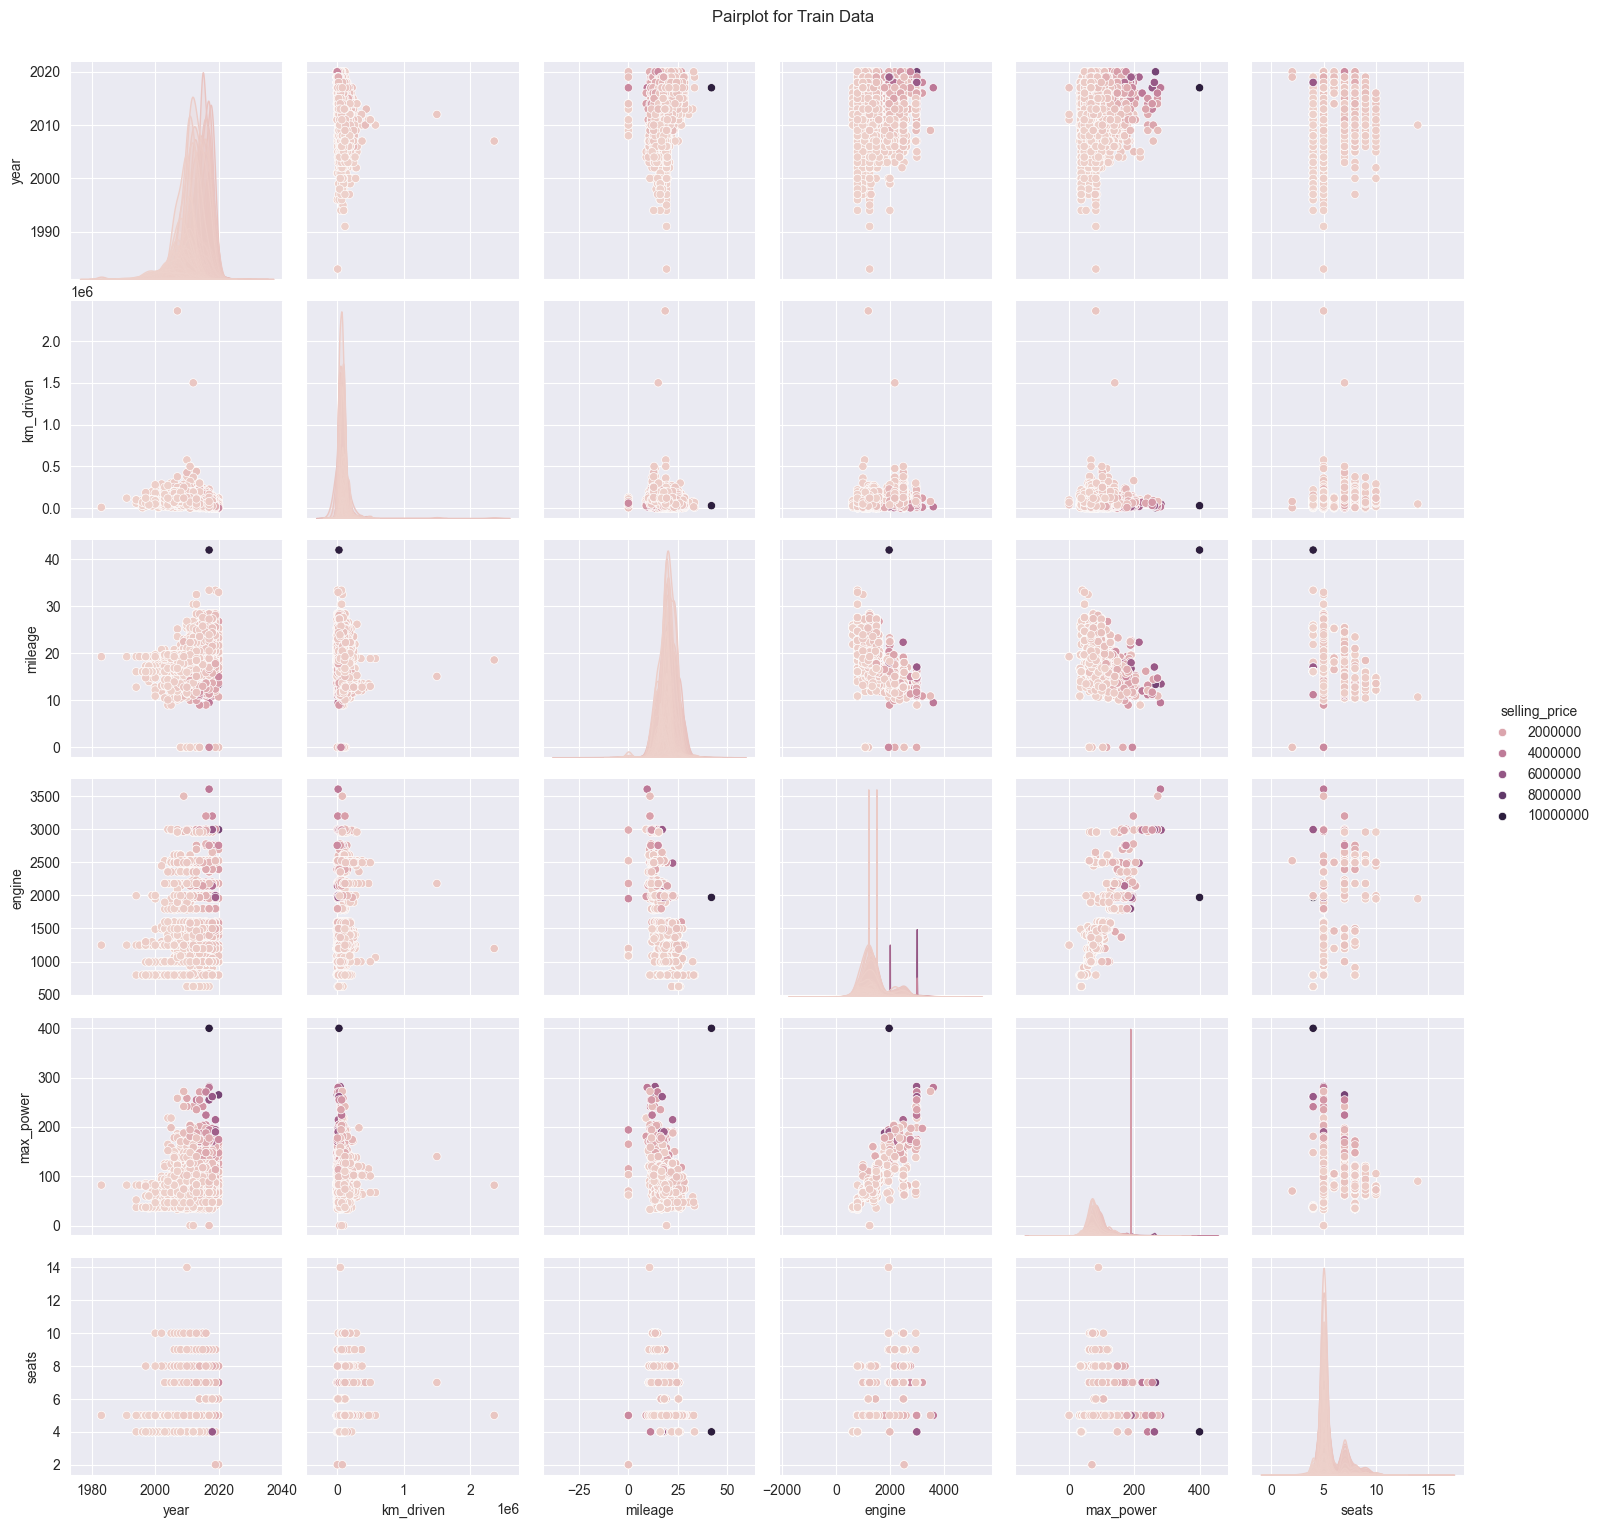

In [127]:

%matplotlib inline
plt.ion()
sns.pairplot(df_train, diag_kind="kde", kind="scatter", hue="selling_price")
plt.suptitle("Pairplot for Train Data", y=1.02)
plt.show()

1. Связь прослеживается, Машины с меньшим пробегом стоят дороже что и логично
2. Мащины с мощным двигателем стоят дороже
3. чем моложе машина тем дороже
4. количесвто мест влияет не сильно

Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
- да можно,думаю engine and maxpower  имееют выраженную ЛЗ

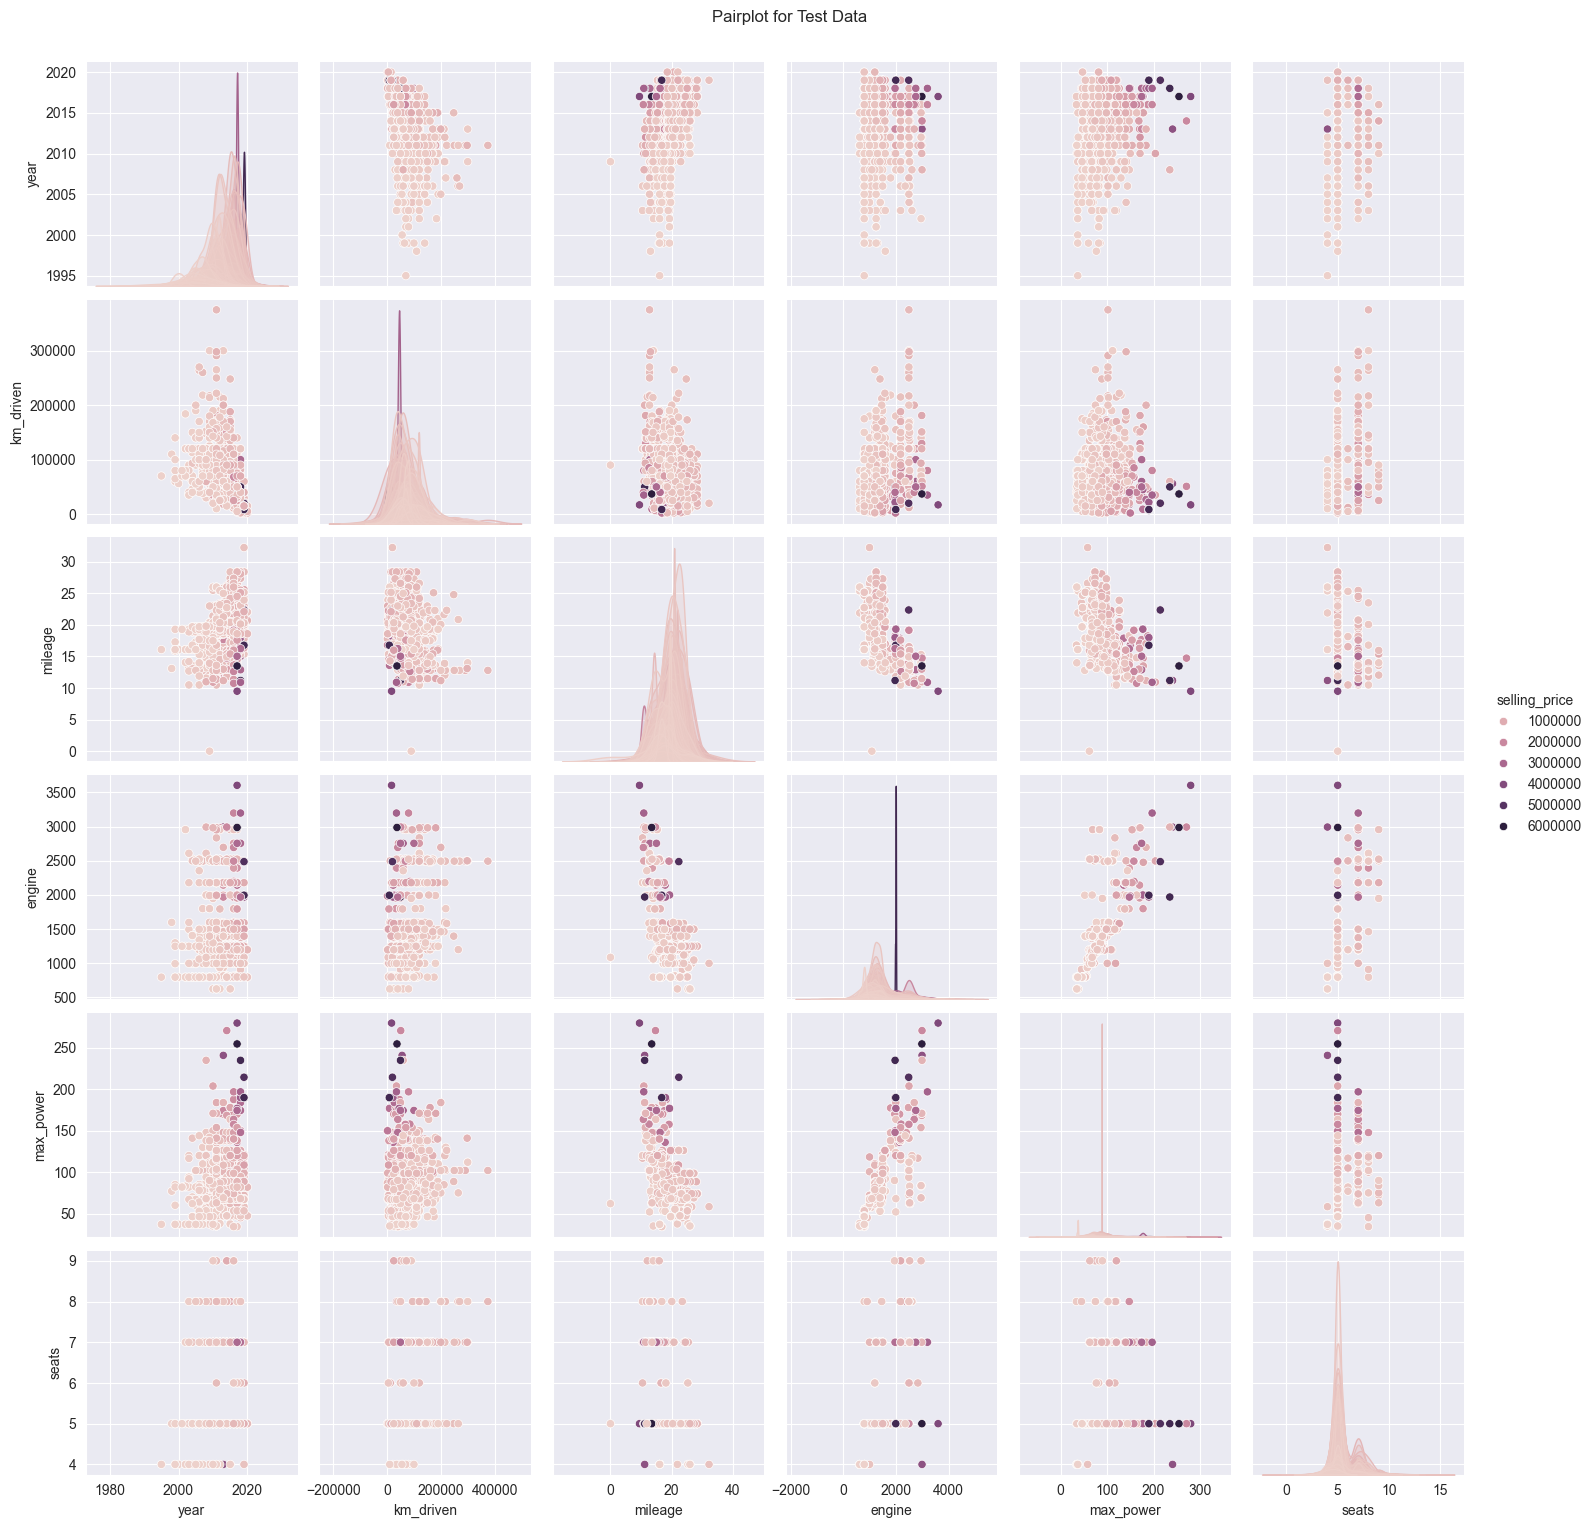

In [128]:
sns.pairplot(df_test, diag_kind="kde", kind="scatter", hue="selling_price")
plt.suptitle("Pairplot for Test Data", y=1.02)
plt.show()

Похожими ли оказались совокупности при разделении на трейн и тест?


В целом  распределения похожи, selling_price имеет меньший диапазон но это как будто ок тк меньше примеров

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


Text(0.5, 1.0, 'Corr  Heatmap')

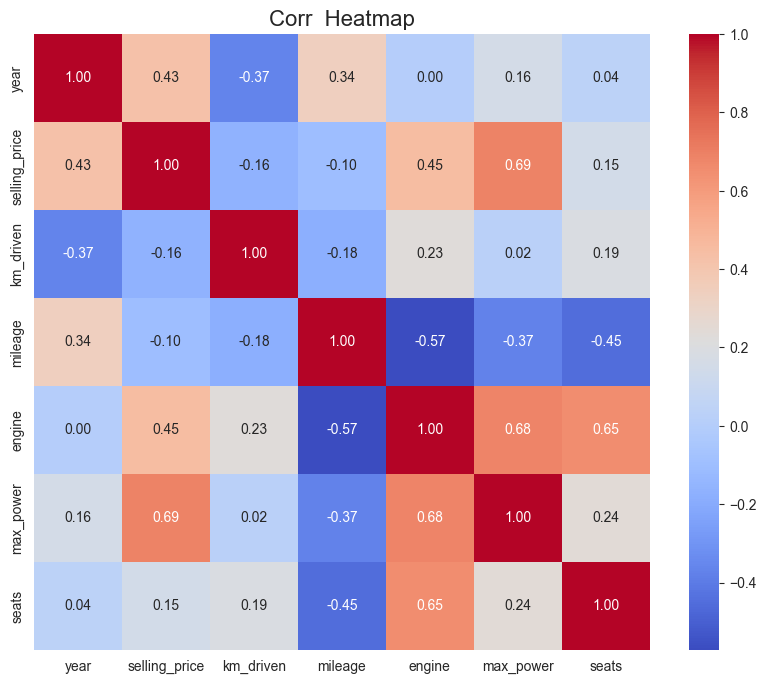

In [129]:
num = df_train.drop(columns=['name','seller_type','transmission','owner','fuel'])
corr = num.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Corr  Heatmap", fontsize=16)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`
engine and year, корреляция 0
между max power and selling price/ engine and max power
есть некая слабая отрицательная коррелция -0ю37 связь есть но не чильная

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

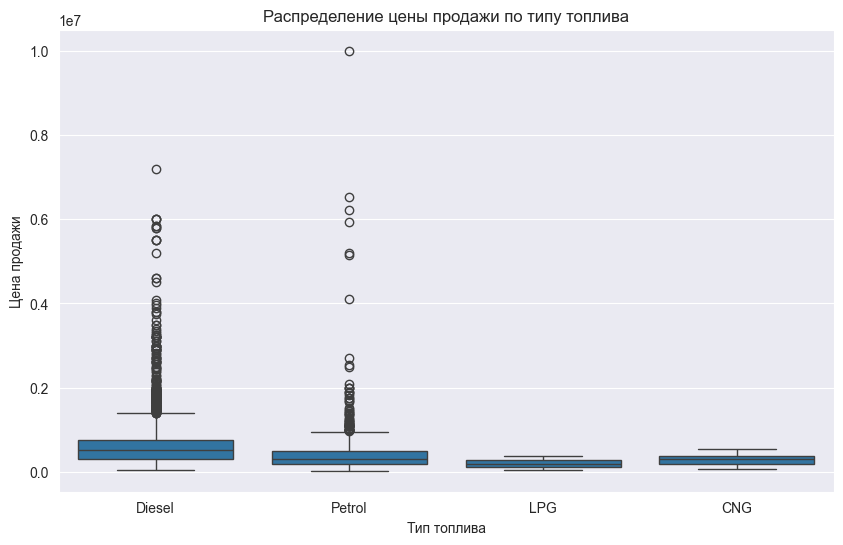

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df_train)
plt.title("Распределение цены продажи по типу топлива")
plt.ylabel("Цена продажи")
plt.xlabel("Тип топлива")
plt.show()

машины на дизеле и бензине продаются заметно дороже чем на газу
Дизельные машины имеют более явные выбросы в цене, что может свидетельствовать о наличии машин премиум-класса или редких моделей.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [131]:
X_train = num.drop(columns=['selling_price'])
y_train = num['selling_price']# your code here

In [132]:
assert X_train.shape == (5840, 6)

In [133]:
numtest = df_test.drop(columns=['name','seller_type','transmission','owner','fuel'])
y_test = numtest['selling_price']
X_test = numtest.drop(columns=['selling_price'])

In [134]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

trainr2 = r2_score(y_train, y_train_pred)
testr2 = r2_score(y_test, y_test_pred)
trainmse = MSE(y_train, y_train_pred)
testmse = MSE(y_test, y_test_pred)

print(f"Train R^2: {trainr2:.3f}")
print(f"Test R^2: {testr2:.3f}")
print(f"Train MSE: {trainmse:.3f}")
print(f"Test MSE: {testmse:.3f}")
# your code here

Train R^2: 0.592
Test R^2: 0.594
Train MSE: 116873067751.522
Test MSE: 233297548204.613


Средние знаяения. Хорошо что R^2 близки на трейе и тесте модель выжала что смогла не переобучилвсь

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [136]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


X_train = num.drop(columns=['selling_price'])
X_test = numtest.drop(columns=['selling_price'])

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
print(X_train_scaled.head())
print(X_test_scaled.head())

       year  km_driven   mileage    engine  max_power     seats
0  0.139570   1.191152  0.996413 -0.373643  -0.439701 -0.434419
1  0.139570   0.766619  0.429384  0.141162   0.493387 -0.434419
2 -0.837167   0.883158  0.896054 -0.068879   0.066037 -0.434419
3 -1.569719   0.766619 -0.835142 -0.270682   0.009142 -0.434419
4  0.872122  -0.482007  0.178486 -0.478663  -0.191257 -0.434419
       year  km_driven   mileage    engine  max_power     seats
0 -0.837167   1.565740 -1.362027  2.200379   0.761428  1.601702
1  0.872122  -0.814974  0.519707  0.139102   0.650798 -0.434419
2 -1.569719   2.405866 -1.638015  0.760986   1.330385 -0.434419
3  0.383754   1.648982  1.422940  0.141162   0.337872 -0.434419
4 -0.592983  -0.065798 -0.734782 -0.530144  -0.724180 -0.434419


In [137]:
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)


train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train R^2: 0.5922629595849875
Test R^2: 0.5941441219017267
Train MSE: 116873067751.52162
Test MSE: 233297548204.603


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [138]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

coefficients

Feature    Coefficient  Abs_Coefficient
4  max_power  322779.703236    322779.703236
0       year  152843.262358    152843.262358
3     engine   61176.857150     61176.857150
1  km_driven  -44148.047511     44148.047511
2    mileage   28781.086595     28781.086595
5      seats  -23220.570226     23220.570226

max_power имеет наибольшее влияние

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [139]:
from sklearn.linear_model import Lasso


X_train = num.drop(columns=['selling_price'])
X_test = numtest.drop(columns=['selling_price'])
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lasso_model.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coef_df)

Train R^2: 0.5922629595497046
Test R^2: 0.5941429546560313
Train MSE: 116873067761.63504
Test MSE: 233298219170.7602
     Feature    Coefficient
4  max_power  322780.586197
0       year  152843.083853
3     engine   61172.025780
2    mileage   28779.204085
5      seats  -23217.693273
1  km_driven  -44146.918538


Есть ощущение что не слишком помогло вепрятно можно увеличить alpha

In [140]:
# your code here

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
lasso_grid = GridSearchCV(Lasso(random_state=42), param_grid, cv=10, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train_scaled, y_train)
print(f"Best alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best R^2 from CV: {lasso_grid.best_score_}")

best_lasso = lasso_grid.best_estimator_
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": best_lasso.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coef_df)

num_models = len(param_grid['alpha']) * 10
print(f"Total models trained: {num_models}")

Best alpha: 1000
Best R^2 from CV: 0.5689041850859416
     Feature    Coefficient
4  max_power  323638.478256
0       year  152628.836894
3     engine   56434.958908
2    mileage   26958.135423
5      seats  -20363.465028
1  km_driven  -43041.283085
Total models trained: 60


60 моделей

1000, не занулилось

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import numpy as np

param_grid = {
    'alpha': np.logspace(-3, 3, 70),
    'l1_ratio': np.linspace(0.1, 1, 100)
}
elastic_net = ElasticNet(max_iter=10000)
grid_searchel = GridSearchCV(elastic_net, param_grid, scoring='r2', cv=10, n_jobs=-1)
grid_searchel.fit(X_train_scaled, y_train)
best_params = grid_searchel.best_params_
total_models = len(param_grid['alpha']) * len(param_grid['l1_ratio'])

print("Best Parameters:", best_params)
print("Models Trained:", total_models)

y_test_pred = grid_searchel.best_estimator_.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test R^2: {test_r2}")
print(f"Test MSE: {test_mse}")



Best Parameters: {'alpha': np.float64(0.3324597932270942), 'l1_ratio': np.float64(0.5636363636363636)}
Models Trained: 7000
Test R^2: 0.5625700277744168
Test MSE: 251447239127.39688


7000 моделей

Лучшие параметры {'alpha': np.float64(0.3324597932270942), 'l1_ratio': np.float64(0.5636363636363636)}

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [143]:
df_test = df_test.drop(columns=['name'])
df_train = df_train.drop(columns=['name'])



In [144]:
df_train

year  selling_price  km_driven    fuel seller_type transmission  \
0     2014         450000     145500  Diesel  Individual       Manual   
1     2014         370000     120000  Diesel  Individual       Manual   
2     2010         225000     127000  Diesel  Individual       Manual   
3     2007         130000     120000  Petrol  Individual       Manual   
4     2017         440000      45000  Petrol  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
5835  2008         120000     191000  Petrol  Individual       Manual   
5836  2013         260000      50000  Petrol  Individual       Manual   
5837  2013         320000     110000  Petrol  Individual       Manual   
5838  2007         135000     119000  Diesel  Individual       Manual   
5839  2009         382000     120000  Diesel  Individual       Manual   

                     owner  mileage  engine  max_power  seats  
0              First Owner    23.40    1248      74.00      5  
1             Second Owner    21.14    1498     103.52      5  
2              First Owner    23.00    1396      90.00      5  
3              First Owner    16.10    1298      88.20      5  
4              First Owner    20.14    1197      81.86      5  
...                    ...      ...     ...        ...    ...  
5835           First Owner    17.92    1086      62.10      5  
5836          Second Owner    18.90     998      67.10      5  
5837           First Owner    18.50    1197      82.85      5  
5838  Fourth & Above Owner    16.80    1493     110.00      5  
5839           First Owner    19.30    1248      73.90      5  

[5840 rows x 11 columns]

In [145]:
X_train_cat = df_train
X_train_cat.shape

(5840, 11)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [147]:
assert X_train_cat.shape == (5840, 1)

In [148]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [161]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
import pandas as pd

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

ohe = OneHotEncoder(
    drop='first',
    sparse_output=False
)

encoded_array = ohe.fit_transform(X_train_cat[categorical_features])
encoded_cols = ohe.get_feature_names_out(categorical_features)

X_train_cat_encoded = pd.DataFrame(
    encoded_array,
    columns=encoded_cols,
    index=X_train_cat.index
)
X_train_cat_final = pd.concat(
    [X_train_cat.drop(columns=categorical_features), X_train_cat_encoded],
    axis=1
)



### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [180]:

X_train = df_train.drop(columns=['selling_price'])
y_train = df_train['selling_price']
X_test = df_test.drop(columns=['selling_price'])
y_test = df_test['selling_price']

In [181]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

numeric_features = ["year", "km_driven", "mileage", "engine", "max_power", "seats"]
categorical_features = ["fuel", "seller_type", "transmission", "owner"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

scorer = make_scorer(r2_score)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scorer,
    cv=10,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['ridge__alpha']
best_score = grid_search.best_score_

print(f"Лучший параметр alpha: {best_alpha}")
print(f"Лучший R^2 на кросс-валидации: {best_score:.4f}")

# Evaluate on test set
test_score = grid_search.best_estimator_.score(X_test, y_test)
print(f"R^2 на тестовой выборке: {test_score:.4f}")

# Save the entire pipeline
joblib.dump(grid_search.best_estimator_, "ridge_pipeline.pkl")

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Лучший параметр alpha: 100
Лучший R^2 на кросс-валидации: 0.6034
R^2 на тестовой выборке: 0.6367


['ridge_pipeline.pkl']

Качество получмлось поднять, хоть и незначительно

# **Часть 4. | Бизнесовая**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [170]:
import numpy as np

def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    within_10_percent = np.abs(y_true - y_pred) / y_true <= 0.10
    return np.mean(within_10_percent)


y_pred_lr = lasso_model.predict(X_test_scaled)
metric_lr = business_metric(y_test, y_pred_lr)
print(f"Lasso Regression: {metric_lr:.4f}")

y_pred_el = grid_searchel.predict(X_test_scaled)
metric_el = business_metric(y_test, y_pred_el)
print(f"elastic net: {metric_el:.4f}")

y_pred_ridge = grid_search.best_estimator_.predict(X_test_scaled)
metric_ridge = business_metric(y_test, y_pred_ridge)
print(f"Ridge Regression: {metric_ridge:.4f}")


Lasso Regression: 0.2270
elastic net: 0.2440
Ridge Regression: 0.2240


/Users/valde/Library/Application Support/JetBrains/DataSpell2024.3/projects/workspace/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(



lasso shows superior performqnce


`Your answer here`

# **Часть 5 | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [174]:
import joblib
joblib.dump(grid_search, "ridge_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(ohe, "encoder.pkl")

['encoder.pkl']

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

![Alt Text](img.png "request")

![Alt Text](img_1.png "pack of request")

![Alt Text](img_2.png "csvload")

# **Часть 6 | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

